<a href="https://colab.research.google.com/github/Liaisan829/hotel/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект по курсу "Анализ данных"
Выполнили: Ахметова Ляйсан 11-004, Терентьева Ольга 11-003

## Описание
Это список из 1000 отелей и их обзоров, предоставленных бизнес-базой данных Datafiniti. Набор данных включает местоположение отеля, название, рейтинг, данные отзывов, название, имя пользователя и многое другое.

## Задача
На основе данных об отелях и отзывах о них найти те параметры, которые влияют на рейтинг больше всего, и вывести способы улучшить его

## Источник данных
Ссылка: https://www.kaggle.com/datasets/datafiniti/hotel-reviews?select=Datafiniti_Hotel_Reviews.csv

# Импорт
Импортируем необходимые для работы библиотеки

In [5]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 


In [81]:
import re

import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline
import seaborn as sns
from datetime import datetime

import chart_studio.plotly as py
py.sign_in('rabird', 'QZh7jQZr3Yc6FMmUdSSS')

from plotly.graph_objs import *
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, roc_curve, RocCurveDisplay
from sklearn.cluster import KMeans, DBSCAN

# Получение данных 
Получим csv-файл с нашими данными из Google Drive.

In [8]:
! gdown --id 1kOX0k7W0O6W5Gug3whIyitHulgtXV_cx

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kOX0k7W0O6W5Gug3whIyitHulgtXV_cx
To: /content/Datafiniti_Hotel_Reviews.csv
100% 49.6M/49.6M [00:00<00:00, 56.0MB/s]


In [9]:
dataset = pd.read_csv('Datafiniti_Hotel_Reviews.csv', on_bad_lines='skip', engine='python')

# Описание, анализ и исправление данных
## Описание
Рассмотрим полученные данные

In [10]:
dataset.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


## Описание полей

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateSeen    

В датасете имеются следующие поля:
1. id - текстовый идентификатор. На 10 000 записей лишь 1800 уникальных значений. Исходя из дальнейших данных, можно предположить, что это идентификатор компании
2. dateAdded - дата и время, когда компания была добавлена в базу данных
3. dateUpdated - дата и время, когда информацию о компании обновляли
4. address - почтовый адрес компании, текст
5. categories - список ключевых слов к данной компании в виде текста
6. primaryCategories - список категорий, к которым относится данная компания. Всего их 6: <br> 
<ul>
  <li>Accommodation & Food Services </li> 
  <li>Arts Entertainment & Recreation</li>
   <li>Healthcare & Social Assistance, Accommodation & Food Services</li>
  <li>Wholesale Trade, Accommodation & Food Services</li>
  <li>Accommodation & Food Services, Arts Entertainment & Recreation</li>
  <li>Utilities</li>
</ul>
7. city - город, в котором расположена компания, текст
8. country - код страны, в которой находится компания, текст
9. keys - ещё один идентификатор, состоящий из страны, субъекта, города, почтового адреса и случайного числа
10. latitude - широта, double
11. longitude - долгота, double
12. name - текстовое название компании
13. postalCode - численный почтовый код
14. province - провинция / штат / субъект, в котором находится компания
15. reviews.date - дата создания отзыва          
16. reviews.dateSeen - даты, когда отзыв просмотрели      
17. reviews.rating - числовая оценка компании в отзыве          
18. reviews.sourceURLs -  URL отзыва
19. reviews.text - текст отзыва          
20. reviews.title - заголовок отзыва, текст        
21. reviews.userCity - город пользователя, оставившего отзыв, текст        
22. reviews.userProvince - субъект / провинция / штат пользователя, текст    
23. reviews.username - имя пользователя, текст        
24. sourceURLs -  URL, с которого взят отель            
25. websites - сайты отелей              


# Исправление данных
## Пропущенные значения
Обработка пустых строк


In [12]:
print(dataset.isnull().sum())

id                         0
dateAdded                  0
dateUpdated                0
address                    0
categories                 0
primaryCategories          0
city                       0
country                    0
keys                       0
latitude                   0
longitude                  0
name                       0
postalCode                 0
province                   0
reviews.date               0
reviews.dateSeen           0
reviews.rating             0
reviews.sourceURLs         0
reviews.text               1
reviews.title              1
reviews.userCity        5836
reviews.userProvince    7295
reviews.username           0
sourceURLs                 0
websites                   0
dtype: int64


Поля, содержащие информацию о местоположении пользователя (reviews.userCity и reviews.userProvince) содержат много пропусков. Но так как эти данные могут понадобиться при анализе отзывов, создадим после 2 датасета: со всеми записями и без разреженных полей и с частью записей, но с данными полями.

## Уникальность
Проверим, сколько уникальных значений содержат переменные

In [13]:
dataset.nunique()

id                      1853
dateAdded               1788
dateUpdated             1632
address                 1846
categories              1148
primaryCategories          6
city                    1021
country                    1
keys                    1853
latitude                1849
longitude               1850
name                    1670
postalCode              1474
province                  49
reviews.date            3188
reviews.dateSeen        2053
reviews.rating            30
reviews.sourceURLs      6386
reviews.text            9981
reviews.title           8622
reviews.userCity        2051
reviews.userProvince     177
reviews.username        6942
sourceURLs              1853
websites                1746
dtype: int64

Поля country и primaryCategories принимают мало значений - 1 и 6 соответственно. Рассмотрим эти значения. 

In [14]:
print('country', dataset['country'].unique())
print('primaryCategories', dataset['primaryCategories'].unique())

country ['US']
primaryCategories ['Accommodation & Food Services'
 'Healthcare & Social Assistance,Accommodation & Food Services'
 'Accommodation & Food Services,Arts Entertainment & Recreation'
 'Arts Entertainment & Recreation'
 'Wholesale Trade,Accommodation & Food Services' 'Utilities']


Колонку country нужно убрать, так как она не даёт никакой информации. Категории же можно оставить для дальнейшего анализа

In [15]:
ds = dataset.copy();
ds.drop(columns=['country'], inplace=True);
ds.head(3)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,keys,latitude,longitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com


## Дубликаты
Проверим, есть ли в датасете дубликаты. Не будем рассматривать даты и урлы - возможно кто-то просто накрутил один и тот же отзыв

In [16]:
ds.duplicated(subset=ds.columns.drop(["reviews.date", "reviews.dateSeen", "reviews.sourceURLs"])).sum()

0

## Стандартизация данных

В исходном датасете даты представлены в формате ISO 8601 в формате UTC. Преобразуем в более читаемый вариант и уберём смещение по времени.

Также явно укажем числовые поля.

In [17]:
#change 'dateAdded' format to date
ds["dateAdded"] = ds["dateAdded"].astype("datetime64")
ds['dateAdded'].apply(lambda x : x.toordinal())

#change 'dateUpdated' format to date
ds["dateUpdated"] = ds["dateUpdated"].astype("datetime64")
ds['dateUpdated'].apply(lambda x : x.toordinal())

#change 'latitude' format to float
ds["latitude"] = ds["latitude"].astype("float")

#change 'longitude' format to float
ds["longitude"] = ds["longitude"].astype("float")

#change 'reviews.date' format to date
ds["reviews.date"] = ds["reviews.date"].astype("datetime64")
ds['reviews.date'].apply(lambda x : x.toordinal)

#change 'reviews.rating' format to float
ds["reviews.rating"] = ds["reviews.rating"].astype("float")

ds['dateAdded'].head()

0   2016-10-30 21:42:42
1   2016-10-30 21:42:42
2   2016-10-30 21:42:42
3   2015-11-28 19:19:35
4   2015-11-28 19:19:35
Name: dateAdded, dtype: datetime64[ns]

В урлах комментариев оставим лишь название хоста

In [18]:
ds['reviews.sourceURLs'] = ds['reviews.sourceURLs'].str.extract('([a-zA-Z0-9][a-zA-Z0-9-]{1,61}[a-zA-Z0-9](?:\.[a-zA-Z]{2,})+)')
ds['reviews.sourceURLs'].head()

0         www.hotels.com
1         www.hotels.com
2         www.hotels.com
3    www.tripadvisor.com
4    www.tripadvisor.com
Name: reviews.sourceURLs, dtype: object

# Разбиение датасета

Разобьем исходный датасет ещё на 2 - entries и reviews. Из entries удалим колонки userCity и userProvince, т.к. они содержат много пропусков, а из reviews - все пустые строки, но оставим для анализа данные колонки

In [19]:
entries = ds.copy();
entries = entries.drop(columns=['reviews.userCity', 'reviews.userProvince'])
entries = entries.dropna(thresh=(len(entries.columns)));
print(entries.info())

print('<--------------------------------------------------------------------->')

print(entries.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  9998 non-null   object        
 1   dateAdded           9998 non-null   datetime64[ns]
 2   dateUpdated         9998 non-null   datetime64[ns]
 3   address             9998 non-null   object        
 4   categories          9998 non-null   object        
 5   primaryCategories   9998 non-null   object        
 6   city                9998 non-null   object        
 7   keys                9998 non-null   object        
 8   latitude            9998 non-null   float64       
 9   longitude           9998 non-null   float64       
 10  name                9998 non-null   object        
 11  postalCode          9998 non-null   object        
 12  province            9998 non-null   object        
 13  reviews.date        9998 non-null   datetime64[n

In [20]:
reviews = ds.copy().dropna(thresh=(len(ds.columns)));
print(reviews.info())

print('<--------------------------------------------------------------------->')

print(reviews.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2657 entries, 3 to 9999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2657 non-null   object        
 1   dateAdded             2657 non-null   datetime64[ns]
 2   dateUpdated           2657 non-null   datetime64[ns]
 3   address               2657 non-null   object        
 4   categories            2657 non-null   object        
 5   primaryCategories     2657 non-null   object        
 6   city                  2657 non-null   object        
 7   keys                  2657 non-null   object        
 8   latitude              2657 non-null   float64       
 9   longitude             2657 non-null   float64       
 10  name                  2657 non-null   object        
 11  postalCode            2657 non-null   object        
 12  province              2657 non-null   object        
 13  reviews.date      

# Визуальный анализ данных

## Проверка актуальности данных

Оценим качество и актуальность данных с помощью гистограм на основании дат добавления (dateAdded) и последнего обновления (dateUpdated) соответственно.



In [21]:
datesAdded = entries.copy().drop_duplicates(subset = ["name"]).groupby([entries["dateAdded"].dt.year, entries["dateAdded"].dt.month]).count();
datesAddedY = datesAdded.id.values;
datesAddedX = [(str(i[0]) + ':' + str(i[1])) for i in datesAdded.index.values];

data_quality = px.bar(x=datesAddedX, y=datesAddedY, labels={'x':'Дата', 'y':'Количество новых записей'})
data_quality.update_layout(
    margin=dict(l=0, r=30, t=30, b=0),
    title="Гистограмма количества добавленных сайтов за месяц",
    xaxis_title="Время",
    yaxis_title="Новые записи",
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="green"
    )

data_quality.show();

In [22]:
datesUpdated = entries.copy().drop_duplicates(subset = ["name"]).groupby([entries["dateUpdated"].dt.year, entries["dateUpdated"].dt.month]).count();
datesUpdatedY = datesUpdated.id.values;
datesUpdatedX = [(str(i[0]) + ':' + str(i[1])) for i in datesUpdated.index.values];

data_relevance = px.bar(x=datesUpdatedX, y=datesUpdatedY, labels={'x':'Дата', 'y':'Количество обновлённых записей'})
data_relevance.update_layout(
    margin=dict(l=0, r=30, t=30, b=0),
    title="Гистограмма количества обновлённых сайтов за месяц",
    xaxis_title="Время",
    yaxis_title="Обновлённые записи записи",
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="green"
    )

data_relevance.show();

**Микровывод**: Как мы можем заметить, многие компании наблюдаются уже не первый год.

В целом видно, что информация обновляется достаточно часто. Но датасет не самый свежий (соревнование давно закончилось), поэтому скажем, что его стоило бы обновить для более точного анализа.


## Анализ компаний по главным критериям

Посмотрим, какие категории у нас имеются и в каком соотношении они представляют датасет

In [23]:
primaryCategories = entries.copy().drop_duplicates(subset = ["name"]).groupby([entries["primaryCategories"]]).count();
primaryCategoriesValues = primaryCategories.id.values;
primaryCategoriesNames = primaryCategories.index;

data_primary_categories = go.Figure(
    data=[go.Pie(labels=primaryCategoriesNames, values=primaryCategoriesValues, hole=.3)]
    );
data_primary_categories.update_layout(
    margin=dict(l=0, r=30, t=30, b=0),
    title="Диаграмма главных категорий компаний",
    title_font_family="Times New Roman",
    title_font_color="green"
    )

data_primary_categories.show();

Микровывод: Как мы можем увидеть, практически весь датасет представляет собой информацию об компаниях по проживанию и питанию, то есть из отелей. Так как нас интересует именно эта информация, отфильтруем наши датасеты по главной категории.

## Представление распределения отелей на карте


Рассмотрим распределение отелей на карте

In [24]:
hotelsCount = entries.copy().drop_duplicates(subset = ["name"]).groupby([entries["city"]]).count();
hotelsAvg = entries.copy().drop_duplicates(subset = ["name"]).groupby([entries["city"]]).mean();
hotels_map_dist = go.Figure();

hotelsCount['text'] = hotelsCount.index.astype('str') + '<br>Отелей: ' + hotelsCount['id'].astype(str)

hotels_map_dist = go.Figure(go.Scattermapbox(lat=hotelsAvg['latitude'], 
                                 lon=hotelsAvg['longitude'], 
                                 text=hotelsCount['text'],
                                 marker=dict(colorbar=dict(title="Количество отелей"),
                                             color=hotelsCount['id'],
                                             size=hotelsCount['id'])))
map_center = go.layout.mapbox.Center(lat=(hotelsAvg['latitude'].max()+hotelsAvg['latitude'].min())/2, 
                                     lon=(hotelsAvg['longitude'].max()+hotelsAvg['longitude'].min())/2)
hotels_map_dist.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=2.5))
hotels_map_dist.show()


Микровывод: Можно сказать, что в центре материка отелей значительно меньше. Основное количество сосредоточено в больших городах и на побережье. Далее нужно отметить, что в западном побережье концентрация отелей меньше, чем в восточной.

## Средние отзывы отелей по штатам

Рассмотрим, какие штаты являются наиболее перспективными для размещения отеля, по отзывам клиентов

In [25]:
reviewsInStates = entries.copy().drop_duplicates(subset = ["name"]).groupby([entries["province"]]).mean().sort_values('reviews.rating');
reviewsInStates = reviewsInStates.iloc[::-1]
reviewsInStatesY = reviewsInStates['reviews.rating'].values;
reviewsInStatesX = reviewsInStates.index;

reviews_in_states_gist = px.bar(x=reviewsInStatesX, y=reviewsInStatesY, labels={'x':'Штаты', 'y':'Средний рейтинг отелей'})
reviews_in_states_gist.update_layout(
    margin=dict(l=0, r=30, t=30, b=0),
    title="Гистограмма среднего рейтинга отелей по штатам",
    xaxis_title="Штаты",
    yaxis_title="Средняя оценка",
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="green"
    )

reviews_in_states_gist.show();

In [26]:
hotelsNumInStates = entries.copy().drop_duplicates(subset = ["name"]).groupby([entries["province"]]).count().sort_values('id');
hotelsNumInStates = hotelsNumInStates.iloc[::-1]
hotelsNumInStatesY = hotelsNumInStates['id'].values;
hotelsNumInStatesX = hotelsNumInStates.index;

hotels_num_in_states = px.bar(x=hotelsNumInStatesX, y=hotelsNumInStatesY, labels={'x':'Штаты', 'y':'Количество отелей'})
hotels_num_in_states.update_layout(
    margin=dict(l=0, r=30, t=30, b=0),
    title="Гистограмма количества отелей в штатах",
    xaxis_title="Штаты",
    yaxis_title="Количество отелей",
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="green"
    )

hotels_num_in_states.show();


Микровывод: Как мы можем заметить, штатами с наиболее хорошими отелями являются:

RI (Rhode Island) - 5.0 (1 отель).

WY (Wyoming) - 4.42 (12 отелей).

SD (South Dakota) - 4.37 (8 отелей).

Но нельзя сказать, что в этих штатах уже расположены наилучшие отели и конкуренция бесполезна. Так в топ-1 штате находится всего лишь один отель

## Корреляция

### Перевод строковых данных и дат в числа
Для построения моделей и графика корреляции переведём наиболее интересные строковые переменные в числа с помощью кодирования. Даты переведём в целые числа - количество секунд

In [27]:
ds.address = pd.Categorical(ds.address)
ds['address_code'] = ds.address.cat.codes

ds.province = pd.Categorical(ds.province)
ds['province_code'] = ds.province.cat.codes

ds.categories = pd.Categorical(ds.categories)
ds['categories_code'] = ds.categories.cat.codes

ds.primaryCategories = pd.Categorical(ds.primaryCategories)
ds['primaryCategories_code'] = ds.primaryCategories.cat.codes

ds.city = pd.Categorical(ds.city)
ds['city_code'] = ds.city.cat.codes

ds.province = pd.Categorical(ds.province)
ds['province_code'] = ds.province.cat.codes

ds['reviews.sourceURLs'] = pd.Categorical(ds['reviews.sourceURLs'])
ds['reviews.sourceURLs_code'] = ds['reviews.sourceURLs'].cat.codes

ds['reviews.userCity'] = pd.Categorical(ds['reviews.userCity'])
ds['reviews.userCity_code'] = ds['reviews.userCity'].cat.codes

ds['reviews.userProvince'] = pd.Categorical(ds['reviews.userProvince'])
ds['reviews.userProvince_code'] = ds['reviews.userProvince'].cat.codes

ds['address_code'].head()

0    1421
1    1421
2    1421
3    1615
4    1615
Name: address_code, dtype: int16

In [28]:
ds['dateUpdated_int'] = ds['dateUpdated'].astype(int)
ds['dateAdded_int'] = ds['dateAdded'].astype(int)
ds['reviews.date_int'] = ds['reviews.date'].astype(int)

ds['dateUpdated_int'].head()

<ipython-input-28-eb4c99f1578d>:1: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

<ipython-input-28-eb4c99f1578d>:2: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

<ipython-input-28-eb4c99f1578d>:3: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



0    1536613587000000000
1    1536613587000000000
2    1536613587000000000
3    1536613576000000000
4    1536613576000000000
Name: dateUpdated_int, dtype: int64

### График
Для графика определим наиболее интересные с точки зрения анализа переменные и построим heatmap на основе данных о корреляции

In [29]:
reviews = ds.copy().dropna(thresh=(len(ds.columns)));

In [30]:
correlation_columns = ['latitude', 'longitude', 'reviews.rating', 'dateUpdated_int', 'dateAdded_int', 'reviews.date_int', 'address_code', 'categories_code', 'primaryCategories_code', 'city_code', 'province_code', 'reviews.sourceURLs_code', 'reviews.userCity_code', 'reviews.userProvince_code']

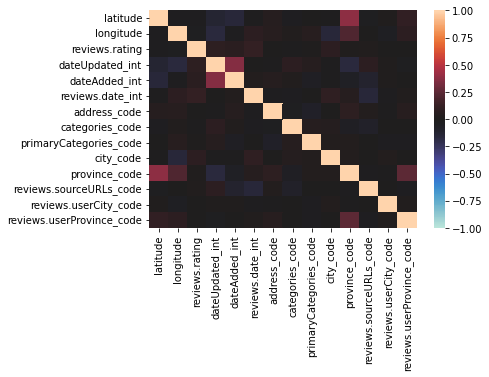

In [31]:
corr = reviews[correlation_columns].corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0)

In [32]:
print(corr)

                           latitude  longitude  reviews.rating  \
latitude                   1.000000  -0.018723       -0.021149   
longitude                 -0.018723   1.000000       -0.037596   
reviews.rating            -0.021149  -0.037596        1.000000   
dateUpdated_int           -0.124692  -0.158954        0.092377   
dateAdded_int             -0.147114  -0.022944        0.070592   
reviews.date_int          -0.013549   0.080113        0.116835   
address_code               0.050875   0.059406       -0.006539   
categories_code           -0.026106   0.030042       -0.008526   
primaryCategories_code     0.002880   0.062406        0.009874   
city_code                 -0.011778  -0.143246        0.078693   
province_code              0.389288   0.216613        0.018973   
reviews.sourceURLs_code   -0.033189   0.003664        0.027993   
reviews.userCity_code      0.022303  -0.039509        0.005707   
reviews.userProvince_code  0.107939   0.084803        0.004383   

         

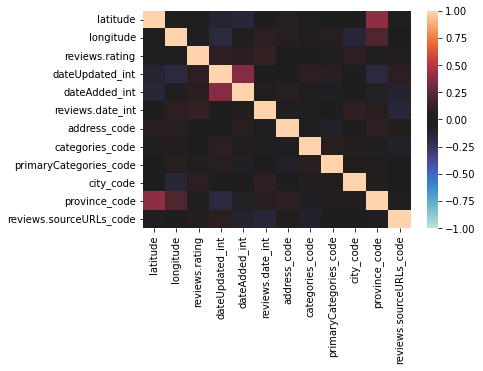

In [33]:
entries = ds.copy();
entries = entries.drop(columns=['reviews.userCity', 'reviews.userProvince'])
entries = entries.dropna(thresh=(len(entries.columns)));

correlation_columns = ['latitude', 'longitude', 'reviews.rating', 'dateUpdated_int', 'dateAdded_int', 'reviews.date_int', 'address_code', 'categories_code', 'primaryCategories_code', 'city_code', 'province_code', 'reviews.sourceURLs_code']

corr = reviews[correlation_columns].corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0)

К сожалению, в данном датасете корреляция между различными данными практически отсутствует либо она очень слабая. Тем не менее, попробуем реализовать модели для предсказания рейтинга на основе имеющихся данных

# Задача регрессии
## Линейная регрессия

Наша задача - предсказать целевую переменную рейтинга отеля по некоторым параметрам. В качестве параметров возьмем те переменные, что коррелируют с целевой наибольшим образом

In [62]:
target_name='reviews.rating'

y=ds[target_name]

y

0       5.0
1       5.0
2       5.0
3       2.0
4       5.0
       ... 
9995    3.0
9996    4.0
9997    4.0
9998    1.0
9999    1.0
Name: reviews.rating, Length: 10000, dtype: float64

In [35]:
features = ['dateAdded_int', 'dateUpdated_int', 'reviews.sourceURLs_code', 'reviews.userCity_code']
X = ds[features]
X

,dateAdded_int,dateUpdated_int,reviews.sourceURLs_code,reviews.userCity_code
0,1477863762000000000,1536613587000000000,6,-1
1,1477863762000000000,1536613587000000000,6,-1
2,1477863762000000000,1536613587000000000,6,-1
3,1448738375000000000,1536613576000000000,11,1400
4,1448738375000000000,1536613576000000000,11,865
...,...,...,...,...
9995,1458819855000000000,1514764846000000000,11,1854
9996,1445900582000000000,1514764844000000000,11,472
9997,1465614743000000000,1514764844000000000,11,1057
9998,1481600676000000000,1514764843000000000,11,2045


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
y_train

9069    4.0
2603    5.0
7738    2.0
1579    4.0
5058    1.0
       ... 
5734    3.0
5191    5.0
5390    2.0
860     2.9
7270    5.0
Name: reviews.rating, Length: 7000, dtype: float64

In [37]:
X_train.shape

(7000, 4)

In [38]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test);

print(mean_absolute_error(y_test, y_pred))

0.9015134438602613


Как можем видеть, MAE получилась большой относительно наших данных. Посмотрим на метрику $R^2$

In [39]:
print(r2_score(y_test, y_pred))

0.011880770753725955


Метрика $R^2$ показала плохой результат. Одной из причин этого является сама структура датасета - переменные слабо коррелируют между собой

## Деревья решений 
Посмотрим, как с предсказыванием рейтинга справится дерево решений, вычислим MAE для него

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(mean_absolute_error(y_test, y_pred))

0.9873241767734557


In [123]:
r2_score(y_test, y_pred)

-0.4129661120771446

R2 дал отрицательный результат, это происходит когда предсказания модели хуже, чем постоянная функция, которая всегда предсказывает среднее значение данных. Один из возможных способов его улучшить 
это попробовать добавить больше данных для повышения стабильности и добавить больше признаков в набор данных.


# Задачи классификации
## Логистическая регрессия
Введём категорию - больше оценка у отзыва 4.0 или нет.
Далее построим модель логистической регрессии, вычислим её точность и построим ROC-кривую

In [124]:
category_column = dataset['reviews.rating']
category_column = category_column > 4.0
y = category_column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

print(accuracy_score(y_pred.astype(float), y_test.astype(float)))

0.5436666666666666


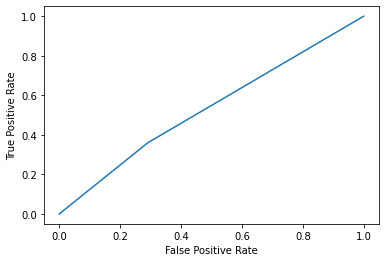

In [42]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Из полученных данных видно, что модель классифицирует данные случайным образом. Одной из причин такого поведения является сама структура датасета - рейтинг отеля практически не зависит ни от одной переменной

# Случайный лес 
Решим задачу классификации с помощью случайного леса, оценим точность и построим ROC-кривую

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_rf = RandomForestClassifier()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

print(accuracy_score(y_pred.astype(float), y_test.astype(float)))

0.5876666666666667


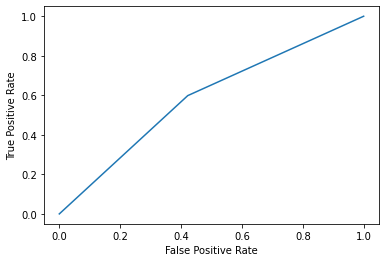

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [45]:
feature_df = pd.DataFrame({'Importance':reg_rf.feature_importances_, 'Features': features })
print(feature_df)

   Importance                 Features
0    0.333416            dateAdded_int
1    0.307129          dateUpdated_int
2    0.043839  reviews.sourceURLs_code
3    0.315616    reviews.userCity_code


# Catboost

In [46]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from catboost import CatBoostRegressor

In [48]:
cat_boost = CatBoostRegressor(depth=5, 
                        iterations=3000,
                        learning_rate=0.04,
                        verbose=False,
                        use_best_model=True,
                        )

In [74]:
cat_boost.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

In [76]:
catboost_predictions = cat_boost.predict(X_test)

In [78]:
mae_catboost = mean_absolute_error(y_test, catboost_predictions)
mae_catboost

0.8853055299230388

In [80]:
r2_score(y_test, catboost_predictions)

0.06571906869837962

Метрика  R2  показала плохой результат. Одной из причин этого является сама структура датасета - переменные слабо коррелируют между собой. Но она показала результат лучше, чем линейная регрессия.

# Кластеризация
Воспользуемся методом k-средних и выделим кластеры штатов для путешествий, популярных в определенных штатах

Методом локтя вычислим наиболее подходящее k 

Text(0.5, 1.0, 'Elbow curve')

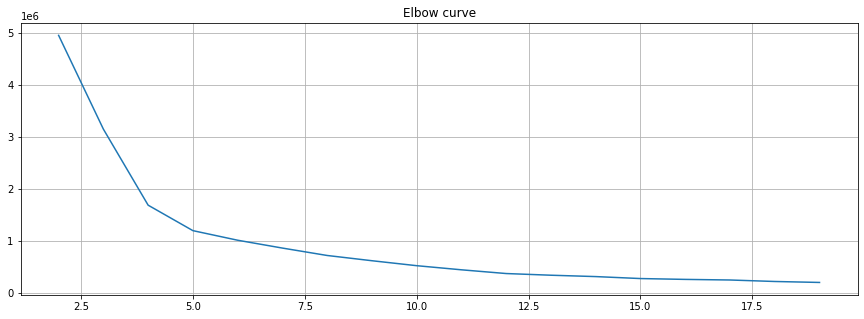

In [83]:
columns = ['reviews.userProvince_code', 'province_code']
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(ds[columns])
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

Получив k, равное 4, проведем кластеризацию

[[  0.29945881  37.96091401]
 [ 73.02907489  23.5030837 ]
 [  1.30470391  10.67072659]
 [143.          25.83140283]]


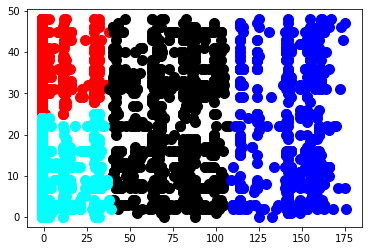

In [84]:
columns = ['reviews.userProvince_code', 'province_code']
kmeans = KMeans(n_clusters=4)
kmeans.fit(ds[columns])

print(kmeans.cluster_centers_)

y_km = kmeans.fit_predict(ds[columns])
cluster_ds = ds[columns].to_numpy()

plt.scatter(cluster_ds[y_km ==0,0], cluster_ds[y_km == 0,1], s=100, c='red')
plt.scatter(cluster_ds[y_km ==1,0], cluster_ds[y_km == 1,1], s=100, c='black')
plt.scatter(cluster_ds[y_km ==2,0], cluster_ds[y_km == 2,1], s=100, c='blue')
plt.scatter(cluster_ds[y_km ==3,0], cluster_ds[y_km == 3,1], s=100, c='cyan')

**Микровывод**: по графику видно, что все штаты популярны

Кластеризация DBSCAN

In [133]:
cluster_dbscan = DBSCAN(eps=4, min_samples=4, n_jobs=-1)

In [134]:
y_dbscan = cluster_dbscan.fit_predict(ds[columns])

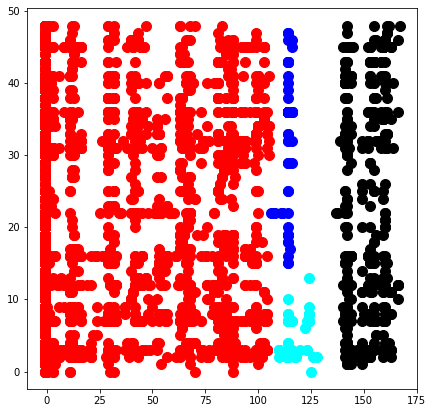

In [137]:
plt.scatter(cluster_ds[y_dbscan ==0,0], cluster_ds[y_dbscan == 0,1], s=100, c='red')
plt.scatter(cluster_ds[y_dbscan ==1,0], cluster_ds[y_dbscan == 1,1], s=100, c='black')
plt.scatter(cluster_ds[y_dbscan ==2,0], cluster_ds[y_dbscan == 2,1], s=100, c='blue')
plt.scatter(cluster_ds[y_dbscan ==3,0], cluster_ds[y_dbscan == 3,1], s=100, c='cyan')

Вывод: кластеризация dbscan дала похожие результаты, но перевешиванием одного из штатов.

# Выводы

Таким образом, наилучшей моделью для предсказания рейтинга отеля на основе данных об отелях стала модель Catboost с результатом на тестовой выборке равным 0.88 коэффициентом детерминации 0.06 (что лучше, чем у линейной регрессии, например)

В качестве решения для улучшения результатов предсказания моделей можно дополнить датасет более точными данными об отелях, такие как количество номеров, звезд и т.д.